Creates visuals of quality of reporting and study design results

In [1]:
#load libraries
library(dplyr)
library(ggplot2)
library(ggpubr)
library(gridExtra)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: magrittr

Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



# Quality of Reporting

In [2]:
#import file
FileName= "Results/UploadedArticle/ForPlotting_ReportingQual.csv"

df<-read.csv(FileName)

#colnames(df)

In [3]:
# get all studies that are NOT AGREE

df_NotAgree = df[df$Reporting.tool != 'AGREE', ]

#df_NotAgree

In [4]:
#set order of facets

SectionOrder <- c('Title', 'Abstract', 'Introduction', 'Methods','Results', 'Discussion', 'Other')

df_NotAgree$Section = factor(df_NotAgree$Section,
                    levels=SectionOrder)



articleOrder = rev(c('Article 1',
                'Article 2',
                'Article 3',
                'Article 4',  
                'Article 5', 
                'Article 6',
                'Article 7',
                'Article 8', 
 'Article 11',
 'Article 12',
 'Article 13',
 'Article 14',
 'Article 15',
 'Article 16',
 'Article 18',
 
 'Article 20',
 'Article 22',
 'Article 24',
 'Article 25',
 'Article 26',
 
 'Article 33',
 'Article 34',
 'Article 35',
 'Article 36',
 'Article 37',
 'Article 38',
 'Article 39'
 ))


df_NotAgree$Article = factor(df_NotAgree$Article,
                    levels=articleOrder)

In [5]:
length(unique(df$Article))
length(unique(df_NotAgree$Article))



[1] 28

[1] 27

In [ ]:
data <- df_NotAgree

plot_NotAgree = ggplot(data,
                       aes(fill=Score, 
                           y=count, 
                           x=Article)) + 

    geom_bar(position="fill", 
             stat="identity") +



facet_wrap(~Section,
          ncol = 4) +

#set colours for the scale
scale_fill_manual(values= c("#d73027",  "#ffffbf", "#1a9850"),
                 name = "Reported",
                 labels = c("No", "Unclear", "Yes")) +

#title
ggtitle("A") +
        
#axis labels
xlab("") +

ylab("%") +
        


#create the theme
theme(line = element_blank(),
      axis.text.x=element_blank(), 
      axis.ticks.x=element_blank() ,        
       axis.text.y= element_text(size=6)
        ) +


#flip graph
coord_flip() 

plot_NotAgree

ERROR: Error in eval(expr, envir, enclos): object 'df_NotAgree' not found


In [7]:
# get all studies that are NOT AGREE

df_Agree = df[df$Reporting.tool == 'AGREE', ]

SectionOrder <- rev(c('Domain 1', 'Domain 2', 'Domain 3', 'Domain 4','Domain 5', 'Domain 6'))

df_Agree$Section = factor(df_Agree$Section,
                    levels=SectionOrder)


In [8]:
data <- df_Agree

plot_Agree = ggplot(data,
                       aes(fill=Score, 
                           y=count, 
                           x=Section)) + 

    geom_bar(position="fill", 
             stat="identity") +

#facet_wrap(~Section,
 #         ncol = 4) +

#set colours for the scale
scale_fill_manual(values= c("#d73027",  "#ffffbf", "#1a9850"),
                 name = "Reported",
                 labels = c("No", "Unclear", "Yes")) +

#title
#ggtitle("") +
ggtitle("B") +
        
#axis labels
xlab("") +

ylab("%") +
        


#create the theme
theme(line = element_blank(),
      axis.text.x=element_blank(), 
      #axis.ticks.x=element_blank()
      legend.position="none",        
       axis.text.y= element_text(size=6)
            
        ) +


#flip graph
coord_flip()  

#plot_Agree

## Put them together

Warning message:
"Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned."Saving 6.67 x 6.67 in image


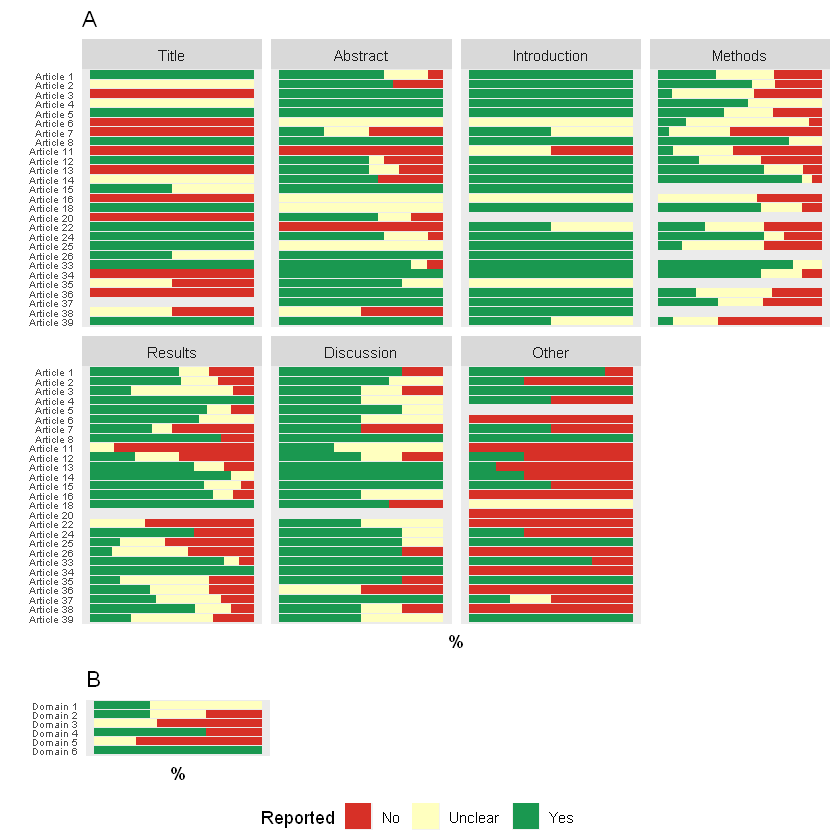

In [9]:
#grid.arrange(plot_NotAgree, arrangeGrob(plot_Agree,), ncol = 2)



QualReporting<- ggarrange(plot_NotAgree,
          
          ggarrange(plot_Agree,NULL, NULL,  ncol = 3),
          
          
          
          ncol = 1, nrow = 2,  align = "v", 
          widths = c(2), heights = c(5, 1),
          common.legend = TRUE,
         legend = "bottom")


#save file

FileLocation = "Results/UploadedArticle/Visuals/ReportingQual.png"

ggsave(file=FileLocation, QualReporting)


QualReporting

# Study Quality

## AMSTAR

In [10]:
#import file
FileName= "Results/UploadedArticle/ForPlotting_AMSTAR.csv"

df_AMSTAR<-read.csv(FileName)

df_AMSTAR$ArticleAnnotate = paste(df_AMSTAR$Article, " (", df_AMSTAR$Study.Type.Code, ")", sep = "")



#colnames(df_AMSTAR)



#head(df_AMSTAR)

In [11]:
#set orders
questions =c('Item 1',
             'Item 2',
             'Item 3',
             'Item 4',
             'Item 5',
             'Item 6',
            'Item 7',
             'Item 8',
             'Item 9',
            'Item 10',
             'Item 11a',
             'Item 11b',
             'Item 12',
             'Item 13',
             'Item 14',
             'Item 15',
             'Item 16')


articleOrder = rev(unique(df_AMSTAR$ArticleAnnotate))


color_dict = c('Yes'= "#1a9850", 
              'No'= "#d73027", 
              'Partial Yes'= "#fee08b", 
              'NA'= "#f7f7f7", 
              np.nan= "#f7f7f7",
              'No meta-analysis conducted'= "#f7f7f7")


In [12]:
Heat_AMSTAR <- ggplot(df_AMSTAR,
       aes(x=Item,
           y=ArticleAnnotate,
           fill=Judgement)) +

geom_tile(color='white',size=.1) +


#set order of bars based on section
scale_x_discrete(limits=questions) +
         
#set order of rows based on section
scale_y_discrete(limits=articleOrder) +
         
#heading
labs(title="AMSTAR")+

#axis labels
xlab("")+
ylab("")+

#blank background and gridlines
theme_classic() +
         
#fill colour
scale_fill_manual(values = color_dict, 
                 labels = c("No", "No meta-analysis conducted/NA", "Partial yes", "Yes", "", "")
                 # guide = FALSE
                 ) +

#add annotations
geom_text(aes(label = Text), size=2) +

theme(legend.position="bottom", 
      legend.box="vertical", 
      legend.margin=margin(), #remove the legend
      
      panel.grid.major= element_blank(),
      #   panel_border=p9.element_blank(),
      panel.background=element_blank(),
      axis.text.x= element_text(angle=90, hjust=1), #rotate x axis labels                                
      axis.text.y= element_text(size=6)
                    )    +


guides(fill=guide_legend(nrow=3,byrow=TRUE))


#Heat_AMSTAR

## MMAT

In [13]:
#import file
FileName= "Results/UploadedArticle/ForPlotting_MMAT.csv"

df_MMAT<-read.csv(FileName)

df_MMAT$ArticleAnnotate = paste(df_MMAT$Article, " (", df_MMAT$Study.Type.Code, ")", sep = "")



#colnames(df_MMAT)



#head(df_MMAT)

In [14]:
#set orders

#article order
articleOrder = rev(unique(df_MMAT$ArticleAnnotate))

#item order
questions = c("S1", "S2" , "1", "2", "3", "4", "5")

color_dict = c('Yes'= "#1a9850", 
              'No'= "#d73027", 
              "Can't tell" = "#fee08b", 
              'NA'= "#f7f7f7"
              )




In [15]:
Heat_MMAT <- ggplot(df_MMAT,
       aes(x=Question,
           y=ArticleAnnotate,
           fill=Judgement)) +
               

geom_tile(color='white',size=.1) +


#set order of bars based on section
scale_x_discrete(limits=questions) +
         
#set order of rows based on section
scale_y_discrete(limits=articleOrder) +
         
#heading
labs(title="MMAT")+

#axis labels
xlab("")+
ylab("")+

#blank background and gridlines
theme_classic() +
         
#fill colour
scale_fill_manual(values=color_dict) +

#add annotations
#geom_text(aes(label = Text), size=5) +

theme(legend.position="bottom", legend.box="vertical", legend.margin=margin(),#remove the legend
      panel.grid.major= element_blank(),
      #   panel_border=p9.element_blank(),
      panel.background=element_blank(),
      axis.text.x= element_text(angle=90, hjust=1), #rotate x axis labels                        
       axis.text.y= element_text(size=6)             )    +


guides(fill=guide_legend(nrow=2,byrow=TRUE))


#Heat_MMAT

## MI-CHE

In [16]:
#import file
FileName= "Results/UploadedArticle/ForPlotting_MI-CHE.csv"

df_MICHE<-read.csv(FileName)

#df_MICHE$ArticleAnnotate = paste(df_MICHE$Article, " (", df_MICHE$Study.Type.Code, ")", sep = "")


#colnames(df_MICHE)


#head(df_MICHE)

In [17]:
#set orders

#article order
articleOrder = rev(unique(df_MICHE$Article))

#item order
questions = c('Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8','Q9', 'Q10')

color_dict = c('Yes'= "#1a9850", 
              'No'= "#d73027", 
              "To some extent"= "#fee08b", 
              'Other'= "#f7f7f7"
              )




In [18]:
Heat_MICHE <- ggplot(df_MICHE,
       aes(x=Question,
           y=Article,
           fill=Judgement)) +
               

geom_tile(color='white',size=.1) +


#set order of bars based on section
scale_x_discrete(limits=questions) +
         
#set order of rows based on section
scale_y_discrete(limits=articleOrder) +
         
#heading
labs(title="MI-CHE")+

#axis labels
xlab("")+
ylab("")+

#blank background and gridlines
theme_classic() +
         
#fill colour
scale_fill_manual(values=color_dict) +

#add annotations
#geom_text(aes(label = Text), size=5) +

theme(legend.position="bottom", legend.box="vertical", legend.margin=margin(), #remove the legend
      panel.grid.major= element_blank(),
      #   panel_border=p9.element_blank(),
      panel.background=element_blank(),
      axis.text.x= element_text(angle=90, hjust=1), #rotate x axis labels                        
              
       axis.text.y= element_text(size=6)        )    +


guides(fill=guide_legend(nrow=2,byrow=TRUE))

#Heat_MICHE

## QUADAS-2

In [19]:
#import file
FileName= "Results/UploadedArticle/ForPlotting_QUADAS-2.csv"

df_QUADAS<-read.csv(FileName)

#df_MICHE$ArticleAnnotate = paste(df_MICHE$Article, " (", df_MICHE$Study.Type.Code, ")", sep = "")


#colnames(df_QUADAS)


#head(df_QUADAS)

In [20]:
#set orders

#article order
articleOrder = rev(unique(df_QUADAS$Article))


#questions
questions = c('Patient Selection', 'Index Test', 'Reference Standard','Flow And Timing')

color_dict = c('Low'= "#1a9850", 
              'High'= "#d73027", 
              "Unclear"= "#fee08b" 
              )



In [21]:
Heat_QUADAS <- ggplot(df_QUADAS,
       aes(x=Question,
           y=Article,
           fill=Judgement)) +
               

geom_tile(color='white',size=.1) +


#set order of bars based on section
scale_x_discrete(limits=questions) +
         
#set order of rows based on section
scale_y_discrete(limits=articleOrder) +
         
#heading
labs(title="QUADAS-2")+

#axis labels
xlab("")+
ylab("")+

#blank background and gridlines
theme_classic() +
         
#fill colour
scale_fill_manual(values=color_dict) +

#add annotations
#geom_text(aes(label = Text), size=5) +

theme(legend.position="bottom", legend.box="vertical", legend.margin=margin(), #remove the legend
      panel.grid.major= element_blank(),
      #   panel_border=p9.element_blank(),
      panel.background=element_blank(),
      axis.text.x= element_text(angle=90, hjust=1), #rotate x axis labels                        
    
       axis.text.y= element_text(size=6))    

#Heat_QUADAS

## Put them together

Warning message:
"Removed 17 rows containing missing values (geom_text)."

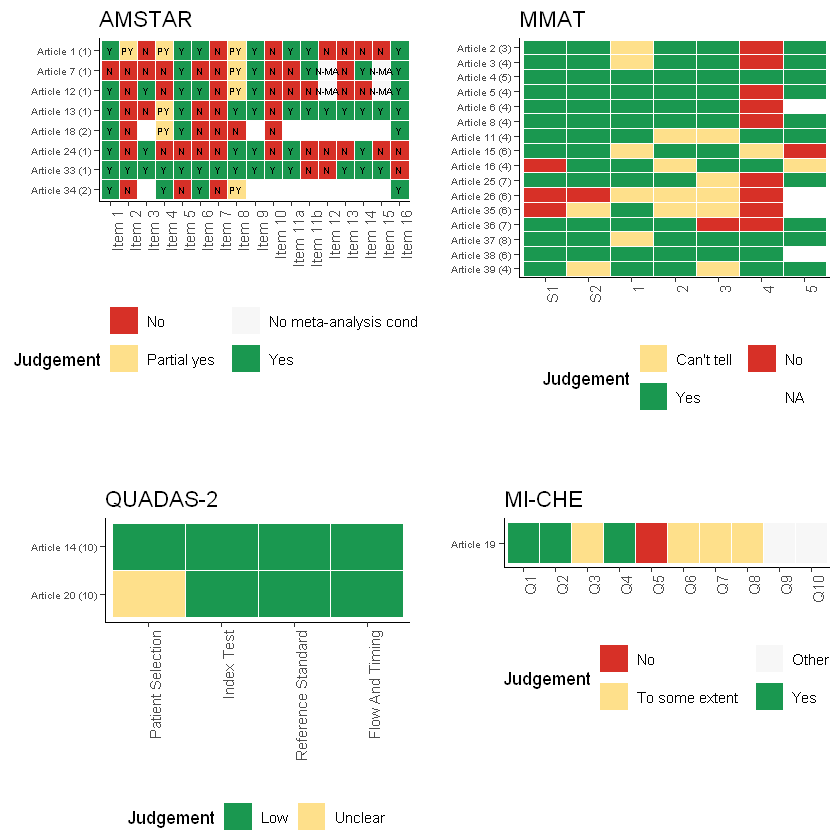

In [22]:
StudyQual <- grid.arrange(Heat_AMSTAR, 
                          Heat_MMAT,
                          Heat_QUADAS, 
                          Heat_MICHE, 
             ncol = 2, 
             layout_matrix = cbind(c(1,1,1,1,1,1,1,NA,3,3,3,3,3,3,NA),
                                   c(1,1,1,1,1,1,1,NA,3,3,3,3,3,3,NA),
                                   c(2,2,2,2,2,2,2,NA,4,4,4,4,NA,NA,NA),
                                   c(2,2,2,2,2,2,2,NA,4,4,4,4,NA,NA,NA)
                                  # c(3,3,4,NA,NA,NA)
                                  )
            )


#FileLocation = "Results/UploadedArticle/Visuals/StudyQual.png"

#ggsave(file=FileLocation, StudyQual)

## Overall

In [23]:
#import file
FileName= "Results/UploadedArticle/ForPlotting_StudyQualALL.csv"

df_StudyQual<-read.csv(FileName)


#set article order
articleOrder = rev(unique(df_StudyQual$ToolArticle))

df_StudyQual$ToolArticle = factor(df_StudyQual$ToolArticle,
                                  levels=articleOrder)


head(df_StudyQual)

str(df_StudyQual)

ArticleNumber,Tool,QualOrder,Judgement,count,ToolArticle,Prop
Article 26 (6),MMAT,0,High,3,MMAT: Article 26 (6),50%
Article 26 (6),MMAT,0,Low,0,MMAT: Article 26 (6),0%
Article 26 (6),MMAT,0,Unclear/Moderate,3,MMAT: Article 26 (6),50%
Article 35 (6),MMAT,1,High,2,MMAT: Article 35 (6),33%
Article 35 (6),MMAT,1,Low,1,MMAT: Article 35 (6),16%
Article 35 (6),MMAT,1,Unclear/Moderate,3,MMAT: Article 35 (6),50%


'data.frame':	81 obs. of  7 variables:
 $ ArticleNumber: Factor w/ 27 levels "Article 1 (1)",..: 14 14 14 18 18 18 8 8 8 26 ...
 $ Tool         : Factor w/ 4 levels "AMSTAR","MI-Che",..: 3 3 3 3 3 3 1 1 1 1 ...
 $ QualOrder    : int  0 0 0 1 1 1 2 2 2 3 ...
 $ Judgement    : Factor w/ 3 levels "High","Low","Unclear/Moderate": 1 2 3 1 2 3 1 2 3 1 ...
 $ count        : int  3 0 3 2 1 3 5 3 1 9 ...
 $ ToolArticle  : Factor w/ 27 levels "QUADAS-2: Article 14 (10)",..: 27 27 27 26 26 26 25 25 25 24 ...
 $ Prop         : Factor w/ 28 levels "0%","100%","11%",..: 17 1 17 11 6 17 19 11 3 22 ...


In [24]:
JudgementOrder <- c('High', 'Unclear/Moderate', 'Low')


df_StudyQual$Judgement = factor(df_StudyQual$Judgement,
                                levels=JudgementOrder)


head(df_StudyQual)

ArticleNumber,Tool,QualOrder,Judgement,count,ToolArticle,Prop
Article 26 (6),MMAT,0,High,3,MMAT: Article 26 (6),50%
Article 26 (6),MMAT,0,Low,0,MMAT: Article 26 (6),0%
Article 26 (6),MMAT,0,Unclear/Moderate,3,MMAT: Article 26 (6),50%
Article 35 (6),MMAT,1,High,2,MMAT: Article 35 (6),33%
Article 35 (6),MMAT,1,Low,1,MMAT: Article 35 (6),16%
Article 35 (6),MMAT,1,Unclear/Moderate,3,MMAT: Article 35 (6),50%


In [25]:
#drop 0%
df_StudyQualNoNULL = df_StudyQual[df_StudyQual$Prop != c("0%"),]

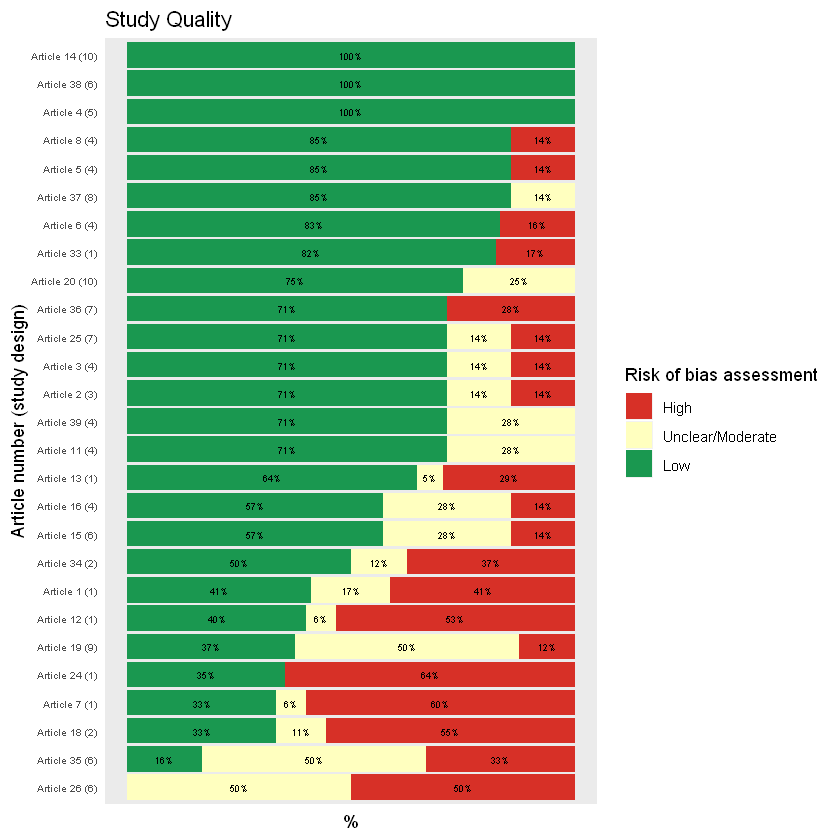

In [26]:
data <- df_StudyQualNoNULL

plot_StudyQual = ggplot(data,
                       aes(
                           fill = Judgement,
                           y=count, 
                           
                           #order by study quality
                           x= reorder(ArticleNumber, QualOrder)
                             )) + 

    geom_bar(position="fill", 
             stat="identity") +

geom_text(aes(label=paste0(Prop)),
          position=position_fill(vjust=0.5), 
          size = 2,
          colour="black") +

#facet_wrap(~Tool,
#          ncol = 4) +

#set colours for the scale
scale_fill_manual(values= c("#d73027",  "#ffffbf", "#1a9850"),
                 name = "Risk of bias assessment",
#                 labels = c("No", "Unclear/Moderate", "Yes")
                 ) +



#title
ggtitle("Study Quality") +
        
#axis labels
xlab("Article number (study design)") +

ylab("%") +
        


#create the theme
theme(line = element_blank(),
      axis.text.x=element_blank(), 
      axis.ticks.x=element_blank() ,        
       axis.text.y= element_text(size=6)
        ) +


#flip graph
coord_flip() 

plot_StudyQual

In [27]:
FileLocation = "Results/UploadedArticle/Visuals/StudyQual.png"

ggsave(file=FileLocation, plot_StudyQual)

Saving 6.67 x 6.67 in image


# Get all dependencies

In [28]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19045)

Matrix products: default

locale:
[1] LC_COLLATE=English_Australia.1252  LC_CTYPE=English_Australia.1252   
[3] LC_MONETARY=English_Australia.1252 LC_NUMERIC=C                      
[5] LC_TIME=English_Australia.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gridExtra_2.3 ggpubr_0.2.5  magrittr_1.5  ggplot2_3.1.1 dplyr_0.8.0.1

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.1       cowplot_1.1.1    tidyselect_0.2.5 munsell_0.5.0   
 [5] uuid_0.1-2       colorspace_1.4-1 R6_2.4.0         rlang_0.3.4     
 [9] plyr_1.8.4       tools_3.6.1      grid_3.6.1       gtable_0.3.0    
[13] withr_2.1.2      htmltools_0.3.6  lazyeval_0.2.2   assertthat_0.2.1
[17] digest_0.6.18    tibble_2.1.1     ggsignif_0.6.1   crayon_1.3.4    
[21] IRdisplay_0.7.0  purrr_0.3.2      repr_0.19.2     